In [1]:
show_plots = True
import matplotlib  
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
sns.set(style="white")
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 10)
import warnings
warnings.filterwarnings("ignore")
covtype_dataset = pd.read_csv("covtype_data.csv",sep=',',names=["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology",
                                                                "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways"
                                                                ,"Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points",
                                                               "Rawah Wilderness Area","Neota Wilderness Area","Comanche Peak Wilderness Area","Cache la Poudre Wilderness Area",
                                                               "Soil_type_1","Soil_type_2","Soil_type_3","Soil_type_4","Soil_type_5","Soil_type_6","Soil_type_7","Soil_type_8","Soil_type_9","Soil_type_10",
                                                                "Soil_type_11","Soil_type_12","Soil_type_13","Soil_type_14","Soil_type_15","Soil_type_16","Soil_type_17","Soil_type_18","Soil_type_19","Soil_type_20","Soil_type_21","Soil_type_22",
                                                                "Soil_type_23","Soil_type_24","Soil_type_25","Soil_type_26","Soil_type_27","Soil_type_28","Soil_type_29","Soil_type_30","Soil_type_31","Soil_type_32","Soil_type_33","Soil_type_34",
                                                                "Soil_type_35","Soil_type_36","Soil_type_37","Soil_type_38","Soil_type_39","Soil_type_40",
                                                               "Cover_type"])
covtype_dataset

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah Wilderness Area,Neota Wilderness Area,Comanche Peak Wilderness Area,Cache la Poudre Wilderness Area,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Soil_type_7,Soil_type_8,Soil_type_9,Soil_type_10,Soil_type_11,Soil_type_12,Soil_type_13,Soil_type_14,Soil_type_15,Soil_type_16,Soil_type_17,Soil_type_18,Soil_type_19,Soil_type_20,Soil_type_21,Soil_type_22,Soil_type_23,Soil_type_24,Soil_type_25,Soil_type_26,Soil_type_27,Soil_type_28,Soil_type_29,Soil_type_30,Soil_type_31,Soil_type_32,Soil_type_33,Soil_type_34,Soil_type_35,Soil_type_36,Soil_type_37,Soil_type_38,Soil_type_39,Soil_type_40,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [2]:
covtype_dataset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah Wilderness Area,Neota Wilderness Area,Comanche Peak Wilderness Area,Cache la Poudre Wilderness Area,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Soil_type_7,Soil_type_8,Soil_type_9,Soil_type_10,Soil_type_11,Soil_type_12,Soil_type_13,Soil_type_14,Soil_type_15,Soil_type_16,Soil_type_17,Soil_type_18,Soil_type_19,Soil_type_20,Soil_type_21,Soil_type_22,Soil_type_23,Soil_type_24,Soil_type_25,Soil_type_26,Soil_type_27,Soil_type_28,Soil_type_29,Soil_type_30,Soil_type_31,Soil_type_32,Soil_type_33,Soil_type_34,Soil_type_35,Soil_type_36,Soil_type_37,Soil_type_38,Soil_type_39,Soil_type_40,Cover_type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Seperate the data into their measurements and category

In [3]:
class_category = range(1,8)
class_name = ['Spruce-Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir'
             ,'Krummholz']
numerical_category = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
binary_category = ['Wilderness_Area', 'Soil_type']

Show the amount of data of each cover type

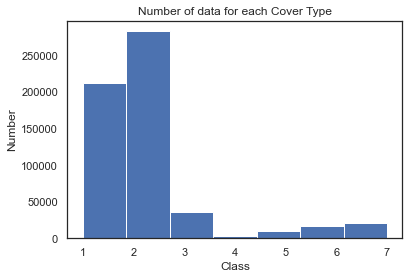

In [4]:
covertype = covtype_dataset['Cover_type']
plt.hist(covertype, bins = 7)
plt.title('Number of data for each Cover Type')
plt.xlabel('Class')
plt.ylabel('Number')
plt.show()

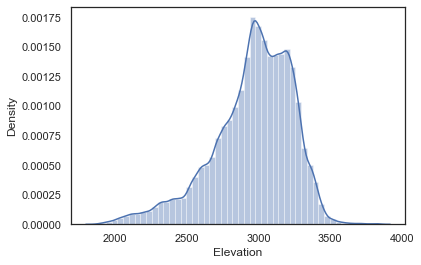

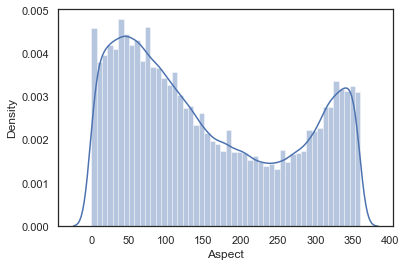

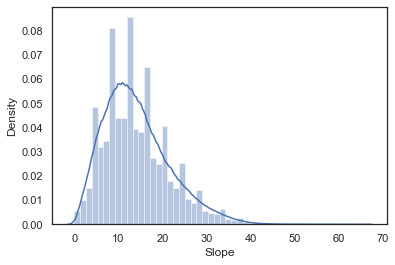

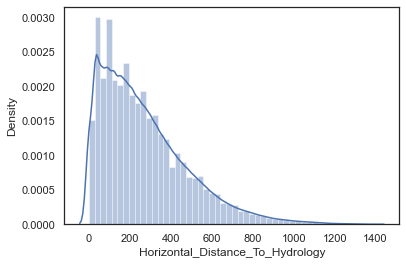

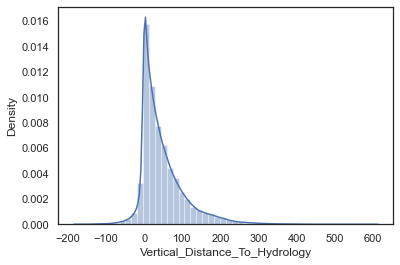

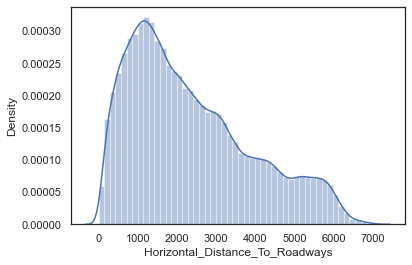

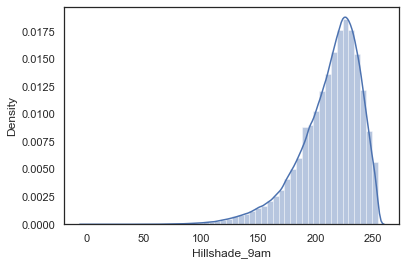

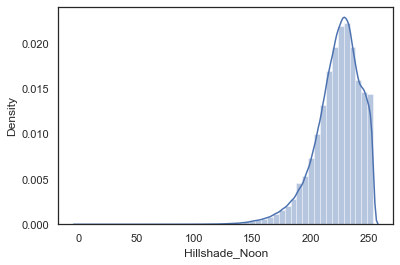

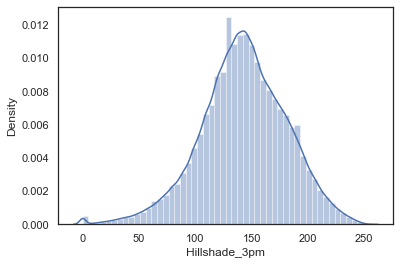

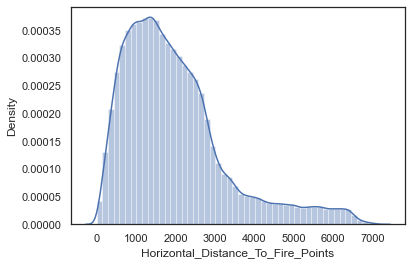

In [5]:
if show_plots:
    for i in numerical_category:
        plt.figure()
        sns.distplot(covtype_dataset[i])
        plt.show()

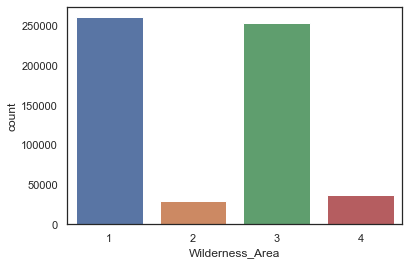

In [6]:
if show_plots:
    # categorical distributions btw train and test set
    wilderness = covtype_dataset['Rawah Wilderness Area'].copy().rename('Wilderness_Area')
    wilderness[covtype_dataset['Neota Wilderness Area'] == 1] = 2
    wilderness[covtype_dataset['Comanche Peak Wilderness Area'] == 1] = 3
    wilderness[covtype_dataset['Cache la Poudre Wilderness Area'] == 1] = 4
    plt.figure()
    sns.countplot(wilderness)
    

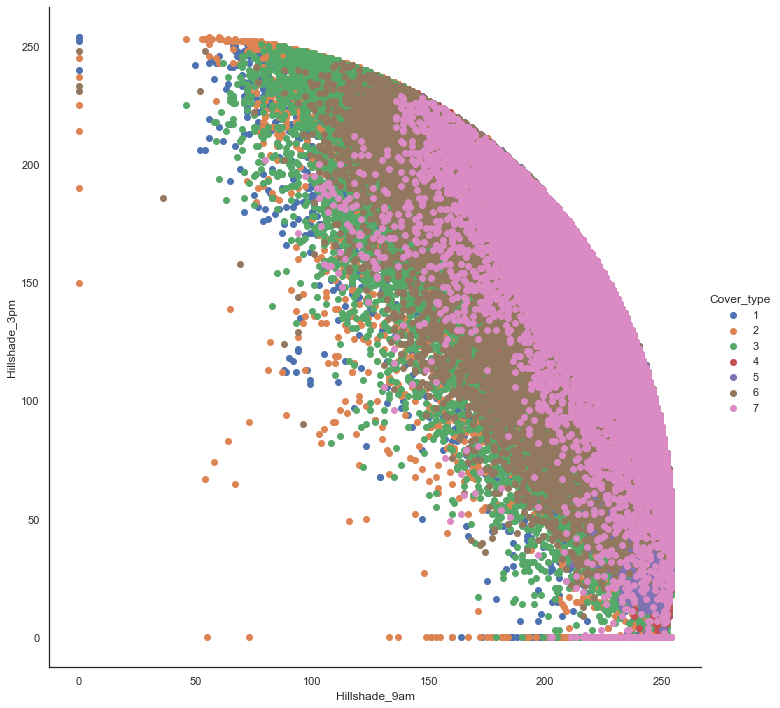

In [7]:
sns.FacetGrid(covtype_dataset,hue="Cover_type",size = 10).map(plt.scatter,"Hillshade_9am","Hillshade_3pm").add_legend()

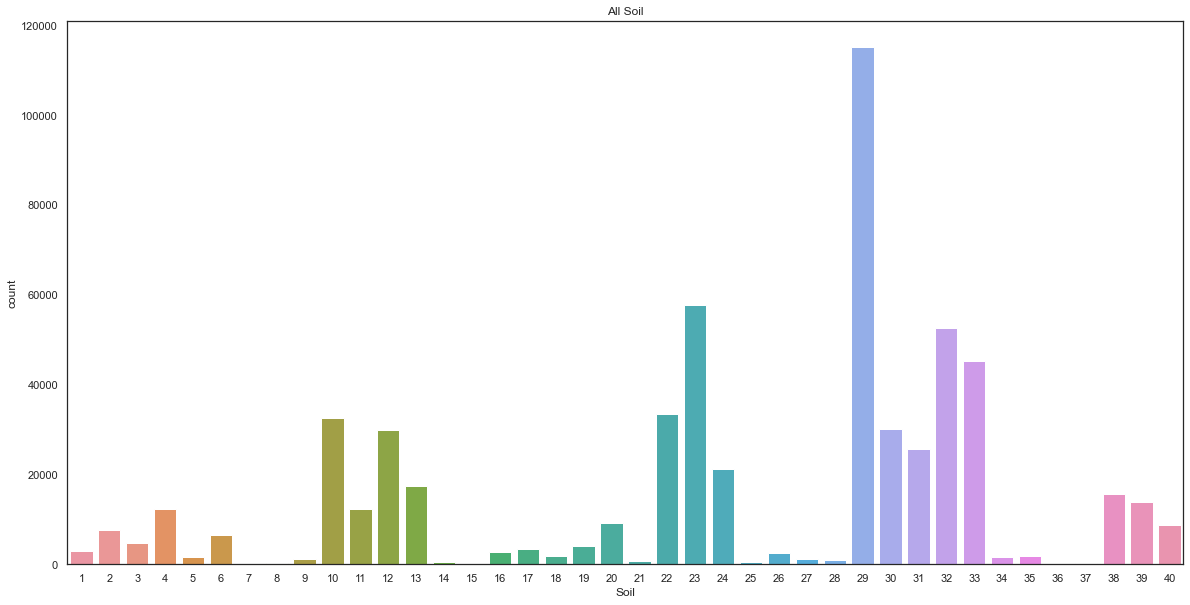

In [8]:
soil = range(1,41)
allSoil = covtype_dataset['Soil_type_1'].copy().rename('Soil')
for i in soil:
    allSoil[covtype_dataset['Soil_type_'+str(i)] == 1] = i
plt.figure(figsize = (20,10))
sns.countplot(allSoil)
plt.title('All Soil')
plt.show()

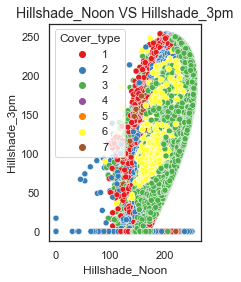

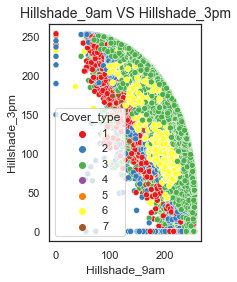

In [9]:
plt.subplot(1,2,1)
sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_type", data=covtype_dataset, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)
plt.show()


plt.subplot(1,2,2)
sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_type", data=covtype_dataset, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)
plt.show()

In [10]:
covtype_dataset = covtype_dataset.drop("Hillshade_9am",axis=1)

<AxesSubplot:>

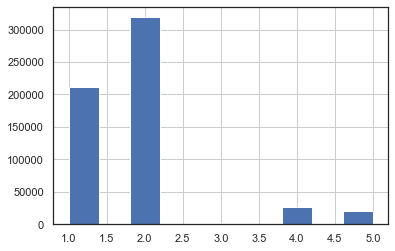

In [11]:
covtype_dataset["covertype_cat"] = pd.cut(covtype_dataset['Cover_type'],bins = [0, 1.5 , 3.0, 4.5 , 6., np.inf], labels = [1 , 2 ,3 ,4 ,5])
covtype_dataset["covertype_cat"].hist()


In [12]:
def spilt_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
train_set, test_set = spilt_train_test(covtype_dataset,0.2) 

In [13]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.33, random_state = 42)
for train_index, test_index in split.split(covtype_dataset, covtype_dataset["covertype_cat"]):
    strat_train_set = covtype_dataset.loc[train_index]
    strat_test_set = covtype_dataset.loc[test_index]


In [14]:
strat_train_set

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah Wilderness Area,Neota Wilderness Area,Comanche Peak Wilderness Area,Cache la Poudre Wilderness Area,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Soil_type_7,Soil_type_8,Soil_type_9,Soil_type_10,Soil_type_11,Soil_type_12,Soil_type_13,Soil_type_14,Soil_type_15,Soil_type_16,Soil_type_17,Soil_type_18,Soil_type_19,Soil_type_20,Soil_type_21,Soil_type_22,Soil_type_23,Soil_type_24,Soil_type_25,Soil_type_26,Soil_type_27,Soil_type_28,Soil_type_29,Soil_type_30,Soil_type_31,Soil_type_32,Soil_type_33,Soil_type_34,Soil_type_35,Soil_type_36,Soil_type_37,Soil_type_38,Soil_type_39,Soil_type_40,Cover_type,covertype_cat
574881,2608,186,39,90,53,2619,233,136,960,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2
82040,3060,290,8,484,56,5861,239,181,4243,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2
116468,2535,130,4,180,14,134,237,146,1499,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
512874,3274,234,8,570,90,459,248,178,1558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
180320,2996,292,7,162,42,1913,239,178,1201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177486,3165,250,14,242,45,5778,249,198,3032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
413347,3027,225,20,492,135,3035,254,196,725,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2
22489,2694,57,13,371,12,1706,213,116,5946,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
154457,2979,27,8,30,4,5474,223,142,2353,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [15]:
X_train = strat_train_set.drop("Horizontal_Distance_To_Fire_Points", axis= 1)
Y_train = strat_train_set["Horizontal_Distance_To_Fire_Points"].copy()
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Rawah Wilderness Area,Neota Wilderness Area,Comanche Peak Wilderness Area,Cache la Poudre Wilderness Area,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Soil_type_7,Soil_type_8,Soil_type_9,Soil_type_10,Soil_type_11,Soil_type_12,Soil_type_13,Soil_type_14,Soil_type_15,Soil_type_16,Soil_type_17,Soil_type_18,Soil_type_19,Soil_type_20,Soil_type_21,Soil_type_22,Soil_type_23,Soil_type_24,Soil_type_25,Soil_type_26,Soil_type_27,Soil_type_28,Soil_type_29,Soil_type_30,Soil_type_31,Soil_type_32,Soil_type_33,Soil_type_34,Soil_type_35,Soil_type_36,Soil_type_37,Soil_type_38,Soil_type_39,Soil_type_40,Cover_type,covertype_cat
574881,2608,186,39,90,53,2619,233,136,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2
82040,3060,290,8,484,56,5861,239,181,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2
116468,2535,130,4,180,14,134,237,146,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
512874,3274,234,8,570,90,459,248,178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
180320,2996,292,7,162,42,1913,239,178,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177486,3165,250,14,242,45,5778,249,198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
413347,3027,225,20,492,135,3035,254,196,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2
22489,2694,57,13,371,12,1706,213,116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
154457,2979,27,8,30,4,5474,223,142,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [16]:
Y_train

574881     960
82040     4243
116468    1499
512874    1558
180320    1201
          ... 
177486    3032
413347     725
22489     5946
154457    2353
483054    1689
Name: Horizontal_Distance_To_Fire_Points, Length: 389278, dtype: int64

In [17]:
imputer = SimpleImputer(strategy="median") 
cov_elevation= covtype_dataset.drop("Elevation", axis=1)
imputer.fit(cov_elevation)
imputer.statistics_

array([ 127.,   13.,  218.,   30., 1997.,  226.,  143., 1710.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.])

In [18]:
X = imputer.transform(cov_elevation)
elevation_tr = pd.DataFrame( X, columns = cov_elevation.columns)
elevation_tr

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah Wilderness Area,Neota Wilderness Area,Comanche Peak Wilderness Area,Cache la Poudre Wilderness Area,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Soil_type_7,Soil_type_8,Soil_type_9,Soil_type_10,Soil_type_11,Soil_type_12,Soil_type_13,Soil_type_14,Soil_type_15,Soil_type_16,Soil_type_17,Soil_type_18,Soil_type_19,Soil_type_20,Soil_type_21,Soil_type_22,Soil_type_23,Soil_type_24,Soil_type_25,Soil_type_26,Soil_type_27,Soil_type_28,Soil_type_29,Soil_type_30,Soil_type_31,Soil_type_32,Soil_type_33,Soil_type_34,Soil_type_35,Soil_type_36,Soil_type_37,Soil_type_38,Soil_type_39,Soil_type_40,Cover_type,covertype_cat
0,51.0,3.0,258.0,0.0,510.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
1,56.0,2.0,212.0,-6.0,390.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
2,139.0,9.0,268.0,65.0,3180.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,155.0,18.0,242.0,118.0,3090.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
4,45.0,2.0,153.0,-1.0,391.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,153.0,20.0,85.0,17.0,108.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
581008,152.0,19.0,67.0,12.0,95.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
581009,159.0,17.0,60.0,7.0,90.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
581010,170.0,15.0,60.0,5.0,90.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0


In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
class Customtransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('|n>>>>>>>init() called.\n')
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        Diagonal_Distance_To_Hydrology = np.sqrt(X[:, 2]**2 + X[:, 3]**2)
        return np.c_[X, Diagonal_Distance_To_Hydrology]


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('transformer', Customtransformer()),
    ('std_scaler', StandardScaler())])

x_train_tr = num_pipeline.fit_transform(X_train)

|n>>>>>>>init() called.



In [21]:
x_train_tr

array([[-1.25472398,  0.27110592,  3.33009648, ...,  0.67889897,
         0.17561663, -0.81621359],
       [ 0.35923624,  1.19984857, -0.81507302, ..., -0.03691825,
         0.17561663,  1.00701456],
       [-1.5153857 , -0.22898627, -1.3499336 , ..., -0.03691825,
         0.17561663, -0.42907464],
       ...,
       [-0.94764305, -0.88089216, -0.14649729, ..., -0.03691825,
         0.17561663,  0.4740064 ],
       [ 0.07000886, -1.1487987 , -0.81507302, ..., -0.75273547,
        -0.91167865, -1.13287866],
       [ 0.78415055, -0.30935823,  0.25464814, ..., -0.03691825,
         0.17561663,  1.09765319]])

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_attribs = list(X_train)
cat_attribs = ["Slope"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs)])
x_train_prepared = full_pipeline.fit_transform(X_train)

|n>>>>>>>init() called.



In [23]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train_prepared, Y_train)
some_data = X_train.iloc[:5]
some_labels = Y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print ('Predictions:', lin_reg.predict(some_data_prepared))
print ('Labels:', list(some_labels))


Predictions: [1418.77978516 3042.15087891  760.14697266 1996.49853516 2112.25634766]
Labels: [960, 4243, 1499, 1558, 1201]


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_prepared, Y_train)
x_train_prepared_predictions = tree_reg.predict(x_train_prepared)
Y_train.shape , x_train_prepared_predictions.shape
tree_mse = mean_squared_error(Y_train,x_train_prepared_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [25]:
scores = cross_val_score(tree_reg,x_train_prepared, Y_train, scoring= "neg_mean_squared_error", cv= 10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
display_scores(tree_rmse_scores)

Mean: 548.1703507925253
Standard Deviation: 4.866344270806862


In [26]:
lin_scores = cross_val_score(lin_reg, x_train_prepared, Y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Mean: 851664175.2446096
Standard Deviation: 1181219643.1676202


In [27]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_prepared, Y_train)
fr_scores = cross_val_score(forest_reg, x_train_prepared, Y_train, scoring="neg_mean_squared_error", cv= 10)
fr_rmse_scores = np.sqrt(-fr_scores)
display_scores(fr_rmse_scores)

Mean: 351.2350937338357
Standard Deviation: 2.79291180058795


In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': [5000, 10000, 20000, 50000], 'max_features': [2, 4, 6, 8]},{'max_depth':[10000, 25000, 70000], 'max_features': [2, 3, 4]}]
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(x_train_prepared, Y_train)
grid_search.best_params_

{'max_depth': 10000, 'max_features': 8}

In [29]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("Horizontal_Distance_To_Fire_Points", axis=1)
y_test = strat_test_set["Horizontal_Distance_To_Fire_Points"].copy()
X_test_prepared = full_pipeline.fit_transform(X_test)

|n>>>>>>>init() called.



In [30]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)

Mean: 890.1233407699815
Standard Deviation: 0.0
